In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ==========================================
# 1. Load and Explore Data (EDA)
# ==========================================
print("--- Loading Data ---")
# Ensure the file name matches your upload
df = pd.read_csv('Mall_Customers.csv') 

print(f"Dataset Shape: {df.shape}")
print(df.head())



--- Loading Data ---
Dataset Shape: (200, 5)
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40



Missing Values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


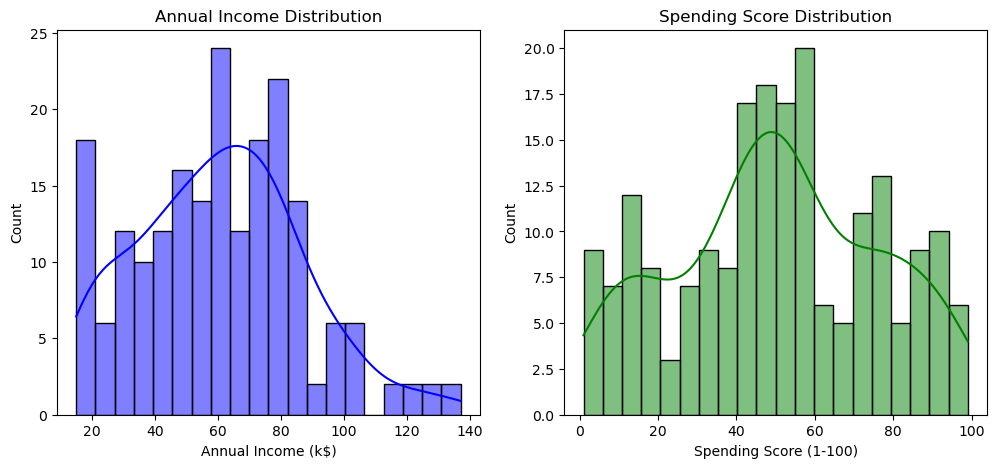

In [3]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Visualizing Distributions (EDA) 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='blue')
plt.title('Annual Income Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='green')
plt.title('Spending Score Distribution')
plt.show()



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



--- Clustering Complete ---
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


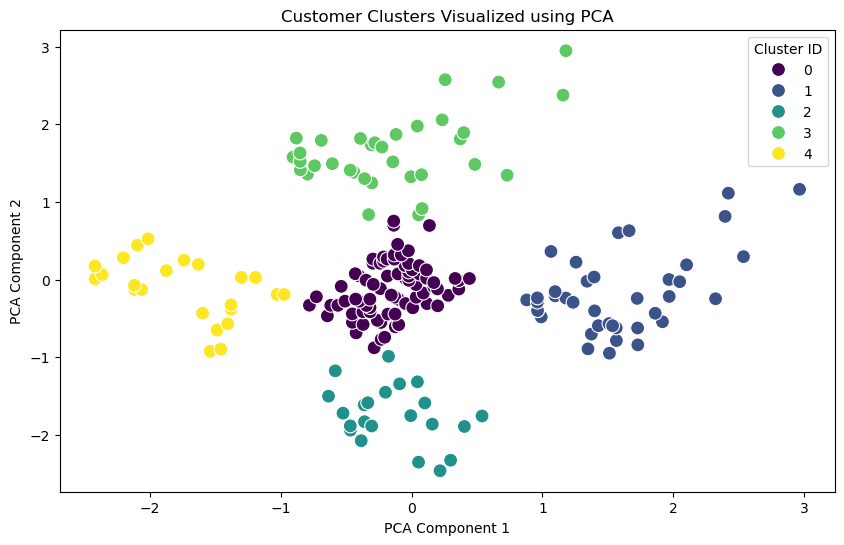


--- Cluster Analysis ---
   Cluster  Annual Income (k$)  Spending Score (1-100)
0        0           55.296296               49.518519
1        1           86.538462               82.128205
2        2           25.727273               79.363636
3        3           88.200000               17.114286
4        4           26.304348               20.913043

--- Proposed Marketing Strategies ---

Cluster 0: Avg Income $55.3k | Avg Spend Score 49.5
-> Strategy: 'Standard Retention'. Average customers. Keep engaged with regular newsletters and seasonal promotions.

Cluster 1: Avg Income $86.5k | Avg Spend Score 82.1
-> Strategy: 'VIP Treatment'. Promote luxury goods, exclusive membership tiers, and personalized concierge services.

Cluster 2: Avg Income $25.7k | Avg Spend Score 79.4
-> Strategy: 'Loyalty Rewards'. Young or budget-conscious trendsetters. Focus on sales, coupons, and 'buy one get one' deals.

Cluster 3: Avg Income $88.2k | Avg Spend Score 17.1
-> Strategy: 'Win-Back'. High pot

In [4]:
# ==========================================
# 2. Preprocessing & K-Means Clustering
# ==========================================
# We focus on Income and Spending Score for meaningful segmentation
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardize the data (Important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means 
# We typically use 5 clusters for this specific dataset (standard practice)
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\n--- Clustering Complete ---")
print(df['Cluster'].value_counts())

# ==========================================
# 3. Visualization using PCA (Dimensionality Reduction)
# ==========================================
# Instructions require PCA or t-SNE 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1], 
    hue=df['Cluster'], 
    palette='viridis', 
    s=100
)
plt.title('Customer Clusters Visualized using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster ID')
plt.show()

# ==========================================
# 4. Marketing Strategies 
# ==========================================
# Analyze the average income and spending score for each cluster
cluster_summary = df.groupby('Cluster')[features].mean().reset_index()
print("\n--- Cluster Analysis ---")
print(cluster_summary)

print("\n--- Proposed Marketing Strategies ---")
for index, row in cluster_summary.iterrows():
    cluster_id = int(row['Cluster'])
    income = row['Annual Income (k$)']
    spend = row['Spending Score (1-100)']
    
    print(f"\nCluster {cluster_id}: Avg Income ${income:.1f}k | Avg Spend Score {spend:.1f}")
    
    if income > 70 and spend > 70:
        print("-> Strategy: 'VIP Treatment'. Promote luxury goods, exclusive membership tiers, and personalized concierge services.")
    elif income > 70 and spend < 35:
        print("-> Strategy: 'Win-Back'. High potential but low engagement. Send personalized offers, discount vouchers, or surveys to understand hesitation.")
    elif income < 40 and spend > 70:
        print("-> Strategy: 'Loyalty Rewards'. Young or budget-conscious trendsetters. Focus on sales, coupons, and 'buy one get one' deals.")
    elif income < 40 and spend < 35:
        print("-> Strategy: 'Mass Market'. Focus on essential goods and clearance sales. Do not overspend on acquisition.")
    else:
        print("-> Strategy: 'Standard Retention'. Average customers. Keep engaged with regular newsletters and seasonal promotions.")